In [1]:
import pandas as pd
import numpy as np

In [2]:
netflix_df=pd.read_csv("netflix_data.csv")
imdb_df=pd.read_csv("imdb_data.csv")

In [3]:
netflix_df.shape

(5521, 10)

In [4]:
netflix_df.head(20)

,id,title,director,cast,country,release_year,date_added,rating,description,runtime
0,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,"December 23, 2016",TV-MA,After a devastating earthquake hits Mexico Cit...,94
1,1,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,"December 20, 2018",R,"When an army recruit is found dead, his fellow...",78
2,2,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,"November 16, 2017",PG-13,"In a postapocalyptic world, rag-doll robots hi...",79
3,3,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,"November 16, 2017",PG-13,"In a postapocalyptic world, rag-doll robots hi...",9
4,4,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,"January 1, 2020",PG-13,A brilliant group of students become card-coun...,123
5,5,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,"June 1, 2020",TV-MA,"After an awful accident, a couple admitted to ...",95
6,6,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,"June 1, 2020",TV-MA,"After an awful accident, a couple admitted to ...",29
7,7,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019,"April 1, 2019",TV-14,"When a doctor goes missing, his psychiatrist w...",120
8,8,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2008,"December 15, 2017",TV-MA,An architect and his wife move into a castle t...,138
9,9,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017,"October 20, 2017",TV-MA,A farmer pens a confession admitting to his wi...,102


In [5]:
missing_cols = netflix_df.columns[netflix_df.isnull().any()]
print(missing_cols)

Index(['director', 'cast', 'country', 'rating'], dtype='object')


In [6]:
from datetime import datetime

class data_cleaner:
    def __init__(self, df):
        self.df=df.copy()

    def clean_text_columns(self):
        text_columns=self.df.select_dtypes(include=['object']).columns
        for col in text_columns:
            self.df[col]=self.df[col].fillna('Unknown')
        print("filled with Uknown")

    def clean_numeric_columns(self):
        numeric_columns=self.df.select_dtypes(include=[np.number]).columns
        for col in numeric_columns:
            val_median=self.df[col].median()
            self.df[col]=self.df[col].fillna(val_median)
        print("filled with median")

    def clean_date_columns(self, threshold: float = 0.8):

        # va converti coloanele de tip object in datatime64 doar daca cel puțin `threshold` (default=80%) dintre valorile nenule pot fi interpretate ca date.
       
        data_columns = self.df.select_dtypes(include=['object']).columns
    
        for col in data_columns:
            try:
                # Încearcă conversia în dată
                converted = pd.to_datetime(df[col], format="%B %d, %Y", errors='coerce')
    
                # Procentul valorilor valide
                non_na = self.df[col].notna().sum()
                valid_dates = converted.notna().sum()
    
                if non_na == 0:
                    continue  # coloană complet goală, ignorăm
    
                ratio = valid_dates / non_na
    
                # Dacă nu trece pragul (ex: < 80%), nu considerăm coloană de tip dată
                if ratio < threshold:
                    print(f"[WARN] Coloana '{col}' a fost lăsată ca text (doar {ratio:.0%} valori par a fi date).")
                    continue
    
                # Verificăm să nu fie numeric mascat
                try:
                    _ = self.df[col].astype(float)
                    print(f"[WARN] Coloana '{col}' NU a fost convertită la dată (pare numerică salvată ca text).")
                    continue
                except:
                    pass
    
                # Conversie finală
                self.df[col] = converted
                print(f"[INFO] Coloana '{col}' a fost detectată ca dată și transformată în datetime64[ns].")
    
            except Exception as e:
                print(f"[ERROR] Conversia pentru coloana '{col}' a eșuat: {e}")
                continue
    
        print("[INFO] Funcția clean_date_columns a fost executată.")

    def clean_duplicates(self):
        initial_len=len(self.df)
        self.df=self.df.drop_duplicates().reset_index(drop=True)
        final_len=len(self.df)
        print(f"[INFO] Eliminat {initial_len - final_len} duplicate. Rânduri finale: {final_len}")
    
    def clean_data(self):
      
        self.clean_text_columns()
        self.clean_numeric_columns()
        self.clean_date_columns()
        self.clean_duplicates()
        return self.df
        

In [7]:
df = pd.DataFrame(netflix_df)

cleaner = data_cleaner(df)
df_clean = cleaner.clean_data()
netflix_df=df_clean.copy()

filled with Uknown
filled with median
[WARN] Coloana 'title' a fost lăsată ca text (doar 0% valori par a fi date).
[WARN] Coloana 'director' a fost lăsată ca text (doar 0% valori par a fi date).
[WARN] Coloana 'cast' a fost lăsată ca text (doar 0% valori par a fi date).
[WARN] Coloana 'country' a fost lăsată ca text (doar 0% valori par a fi date).
[INFO] Coloana 'date_added' a fost detectată ca dată și transformată în datetime64[ns].
[WARN] Coloana 'rating' a fost lăsată ca text (doar 0% valori par a fi date).
[WARN] Coloana 'description' a fost lăsată ca text (doar 0% valori par a fi date).
[INFO] Funcția clean_date_columns a fost executată.
[INFO] Eliminat 0 duplicate. Rânduri finale: 5521


In [8]:
df_1 = pd.DataFrame(imdb_df)

cleaner = data_cleaner(df_1)
df_clean = cleaner.clean_data()
imdb_df=df_clean.copy()
imdb_df.head(20)

filled with Uknown
filled with median
[ERROR] Conversia pentru coloana 'type' a eșuat: 'type'
[ERROR] Conversia pentru coloana 'genres' a eșuat: 'genres'
[INFO] Funcția clean_date_columns a fost executată.
[INFO] Eliminat 0 duplicate. Rânduri finale: 5521


,id,type,genres,average_rating,num_votes
0,0,movie,"Drama,History",5.9,578
1,1,movie,Horror,4.6,857
2,2,movie,"Action,Adventure,Animation",7.1,134245
3,3,short,"Comedy,Drama,Short",5.4,81
4,4,movie,"Crime,Drama,History",6.8,231556
5,5,movie,"Horror,Thriller",5.9,2468
6,6,tvEpisode,Comedy,7.5,140
7,7,movie,Thriller,5.3,441
8,8,movie,"Horror,Mystery,Romance",6.4,2991
9,9,movie,"Crime,Drama,Horror",6.3,54597


In [9]:
netflix_df.dtypes

id                       int64
title                   object
director                object
cast                    object
country                 object
release_year             int64
date_added      datetime64[ns]
rating                  object
description             object
runtime                  int64
dtype: object

In [10]:
imdb_df.duplicated().sum()

0

In [11]:
netflix_df.isnull().sum()

id               0
title            0
director         0
cast             0
country          0
release_year     0
date_added      11
rating           0
description      0
runtime          0
dtype: int64

In [12]:
netflix_df = netflix_df.dropna(subset=['date_added'])

In [13]:
df_imdb_netflix=pd.merge(netflix_df, imdb_df, on="id", how="inner")

In [14]:
df_imdb_netflix["genres"]=df_imdb_netflix["genres"].fillna("")
df_genres=df_imdb_netflix["genres"].str.get_dummies(sep=",")
df_imdb_netflix=pd.concat([df_imdb_netflix, df_genres],axis=1)

In [15]:
df_type_encoded = pd.get_dummies(df_imdb_netflix["type"], prefix="type")
df_imdb_netflix = pd.concat([df_imdb_netflix, df_type_encoded], axis=1)
df_imdb_netflix.drop("type", axis=1, inplace=True)


In [16]:
df_imdb_netflix[df_imdb_netflix.select_dtypes(bool).columns] = \
    df_imdb_netflix.select_dtypes(bool).astype(int)


In [17]:
df_imdb_netflix.dtypes

id                            int64
title                        object
director                     object
cast                         object
country                      object
release_year                  int64
date_added           datetime64[ns]
rating                       object
description                  object
runtime                       int64
genres                       object
average_rating              float64
num_votes                     int64
Action                        int64
Adult                         int64
Adventure                     int64
Animation                     int64
Biography                     int64
Comedy                        int64
Crime                         int64
Documentary                   int64
Drama                         int64
Family                        int64
Fantasy                       int64
Game-Show                     int64
History                       int64
Horror                        int64
Music                       

In [18]:
#Clasificare — „Calitatea filmului”

def rating_class(x):
    if x< 5.0:
        return "Bad"
    elif x<6.5:
        return "Average"
    elif x<8.0:
        return "Good"
    else:
        return "Excellent"

df_imdb_netflix["rating_class"]= df_imdb_netflix["average_rating"].apply(rating_class)



In [19]:
type_cols = [col for col in df_imdb_netflix.columns if col.startswith("type_")]
features = df_genres.columns.tolist() + ["num_votes"] + type_cols

X = df_imdb_netflix[features]
y = df_imdb_netflix["rating_class"]

print("Dimensiunea X:", X.shape)
print("Dimensiunea y:", y.shape)


Dimensiunea X: (5510, 38)
Dimensiunea y: (5510,)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [21]:
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)
model= RandomForestClassifier(n_estimators=200,class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

     Average       0.42      0.41      0.41       384
         Bad       0.32      0.33      0.32       124
   Excellent       0.37      0.31      0.34       104
        Good       0.52      0.54      0.53       490

    accuracy                           0.45      1102
   macro avg       0.41      0.40      0.40      1102
weighted avg       0.45      0.45      0.45      1102



In [22]:
import pandas as pd

feat_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(feat_importances.head(10))


num_votes         0.598583
type_movie        0.039299
Drama             0.027310
Documentary       0.026716
Comedy            0.024162
type_tvEpisode    0.022047
Crime             0.019254
Action            0.017740
Horror            0.016775
Romance           0.016249
dtype: float64


In [23]:
#as num_votes have ununiform distribution 
df_imdb_netflix["num_votes_log"] = np.log1p(df_imdb_netflix["num_votes"])
df_imdb_netflix.dtypes

id                            int64
title                        object
director                     object
cast                         object
country                      object
release_year                  int64
date_added           datetime64[ns]
rating                       object
description                  object
runtime                       int64
genres                       object
average_rating              float64
num_votes                     int64
Action                        int64
Adult                         int64
Adventure                     int64
Animation                     int64
Biography                     int64
Comedy                        int64
Crime                         int64
Documentary                   int64
Drama                         int64
Family                        int64
Fantasy                       int64
Game-Show                     int64
History                       int64
Horror                        int64
Music                       

In [24]:

type_cols = [col for col in df_imdb_netflix.columns if col.startswith("type_")]


features = df_genres.columns.tolist() + ['num_votes_log', 'release_year', 'runtime']+ type_cols
X = df_imdb_netflix[features]
y = df_imdb_netflix["rating_class"]


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)
model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)

# Evaluare
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     Average       0.51      0.54      0.53       384
         Bad       0.45      0.27      0.34       124
   Excellent       0.51      0.22      0.31       104
        Good       0.60      0.71      0.65       490

    accuracy                           0.55      1102
   macro avg       0.52      0.43      0.46      1102
weighted avg       0.54      0.55      0.54      1102



In [26]:
import pandas as pd

feat_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(feat_importances.head(10))


num_votes_log     0.272591
runtime           0.222301
release_year      0.148713
type_movie        0.031652
Documentary       0.027446
Drama             0.026019
Comedy            0.023817
type_tvEpisode    0.017864
Crime             0.017580
Action            0.017315
dtype: float64


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # transform 'Bad', 'Average', 'Good', 'Excellent' → 0,1,2,3

# verificăm maparea
print(dict(zip(le.classes_, range(len(le.classes_)))))


{'Average': 0, 'Bad': 1, 'Excellent': 2, 'Good': 3}


In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)

model = XGBClassifier(
    max_depth=6,
    n_estimators=400,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="mlogloss"
)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

     Average       0.55      0.60      0.58       384
         Bad       0.54      0.27      0.36       124
   Excellent       0.54      0.20      0.29       104
        Good       0.62      0.74      0.67       490

    accuracy                           0.59      1102
   macro avg       0.56      0.45      0.47      1102
weighted avg       0.58      0.59      0.57      1102



In [30]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:\n", cm)


Confusion matrix:
 [[231  24   2 127]
 [ 66  33   2  23]
 [  8   1  21  74]
 [112   3  14 361]]


In [31]:
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.5862068965517241


In [32]:
#SMOTE va genera exemple sintetice pentru clasele minoritare (Bad și Excellent) astfel încât toate clasele să fie aproximativ egale.

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Dimensiunea originală a clasei train:", X_train.shape)
print("Dimensiunea după SMOTE:", X_train_res.shape)


Dimensiunea originală a clasei train: (4408, 40)
Dimensiunea după SMOTE: (7844, 40)


In [33]:
model_XGBC = XGBClassifier(
    max_depth=6,
    n_estimators=400,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="mlogloss"
)
model_XGBC.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [34]:
y_pred = model_XGBC.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.53      0.54       384
           1       0.38      0.48      0.43       124
           2       0.42      0.40      0.41       104
           3       0.63      0.62      0.62       490

    accuracy                           0.55      1102
   macro avg       0.50      0.51      0.50      1102
weighted avg       0.56      0.55      0.55      1102



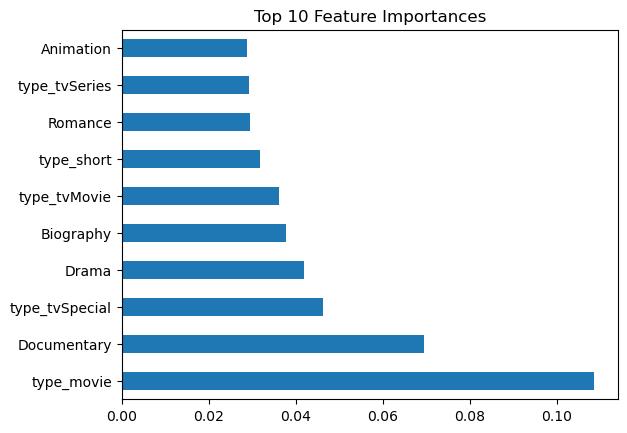

In [35]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(model_XGBC.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importances.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [36]:
#####Trenduri pe genuri — ratinguri medii
df_genres_with_rating=df_imdb_netflix.copy()
df_genres_with_rating["average_rating"]=df_imdb_netflix["average_rating"]


genre_rating_mean={}
for genre in df_imdb_netflix.columns:
    genre_rating_mean[genre]=df_genres_with_rating.loc[df_genres_with_rating[genre]==1, "average_rating"].mean()

genre_rating_mean_df=pd.DataFrame.from_dict(genre_rating_mean, orient='index', columns=['mean_rating'])
genre_rating_mean_df=genre_rating_mean_df.sort_values(by='mean_rating', ascending=False)

print("Top genuri dupa rating mediu:")
print(genre_rating_mean_df.head(10))


Top genuri dupa rating mediu:
                   mean_rating
type_tvMiniSeries     7.538312
type_tvEpisode        7.396522
News                  7.350000
Biography             7.094774
Documentary           7.067227
History               7.034896
Adult                 7.033333
type_tvSeries         7.007460
War                   6.957377
Music                 6.834568


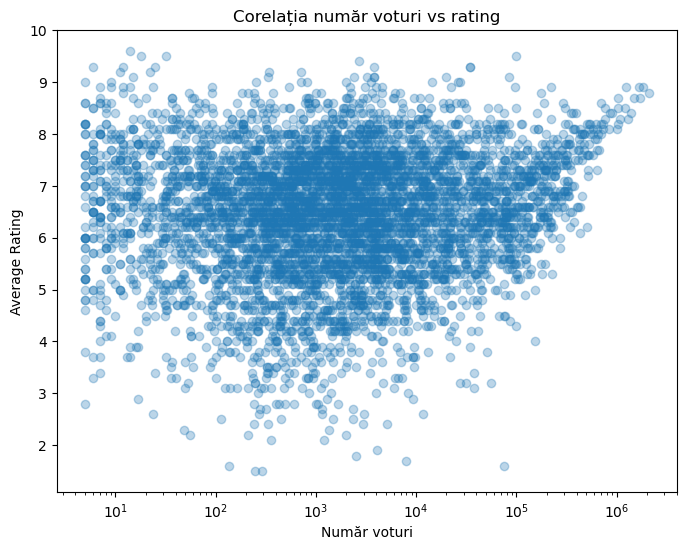

Corelația Pearson între voturi și rating: 0.176


In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_imdb_netflix["num_votes"], df_imdb_netflix["average_rating"], alpha=0.3)
plt.xlabel("Număr voturi")
plt.ylabel("Average Rating")
plt.title("Corelația număr voturi vs rating")
plt.xscale("log") 
plt.show()

# calculate coef pearson
correlation = df_imdb_netflix["num_votes"].corr(df_imdb_netflix["average_rating"])
print(f"Corelația Pearson între voturi și rating: {correlation:.3f}")


In [38]:
df_genres_with_rating["num_votes"] = df_imdb_netflix["num_votes"]


genre_stats = df_genres_with_rating.groupby(df_genres.columns.tolist()).agg(
    avg_rating=('average_rating','mean'),
    avg_votes=('num_votes','mean')
)

#calculate per genre
genre_votes_rating = {}
for genre in df_genres.columns:
    genre_votes_rating[genre] = {
        'avg_rating': df_genres_with_rating.loc[df_genres_with_rating[genre]==1, "average_rating"].mean(),
        'avg_votes': df_genres_with_rating.loc[df_genres_with_rating[genre]==1, "num_votes"].mean()
    }

genre_votes_rating_df = pd.DataFrame.from_dict(genre_votes_rating, orient='index')
genre_votes_rating_df = genre_votes_rating_df.sort_values(by='avg_rating')
print("Genuri cu rating scăzut dar multe voturi:")
print(genre_votes_rating_df.head(10))


Genuri cu rating scăzut dar multe voturi:
           avg_rating      avg_votes
Horror       5.639776   29098.523810
Thriller     5.933172   35678.859903
Game-Show    5.990909    1480.454545
Family       6.117647   16507.984520
Sci-Fi       6.215873   94943.201058
Action       6.216193   53251.082057
Western      6.227778  107516.055556
Comedy       6.248684   21978.049342
Adventure    6.323684   64703.992481
Mystery      6.350000   36609.840000


In [39]:
#######Clustering and segmentation

In [40]:
X_cluster =df_imdb_netflix[["num_votes_log", "average_rating"]]
print(X_cluster.head())

   num_votes_log  average_rating
0       6.361302             5.9
1       6.754604             4.6
2      11.807429             7.1
3       4.406719             5.4
4      12.352581             6.8


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

##### KMeans
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters=kmeans.fit_predict(X_scaled)

df_imdb_netflix["cluster"]=clusters

In [42]:
cluster_summary = df_imdb_netflix.groupby("cluster")[["average_rating", "num_votes"]].mean()
print(cluster_summary)


         average_rating      num_votes
cluster                               
0              6.863986     113.981233
1              5.799207   10474.156453
2              4.432368    1320.234211
3              7.457175    2642.293013
4              7.124096  140472.365827


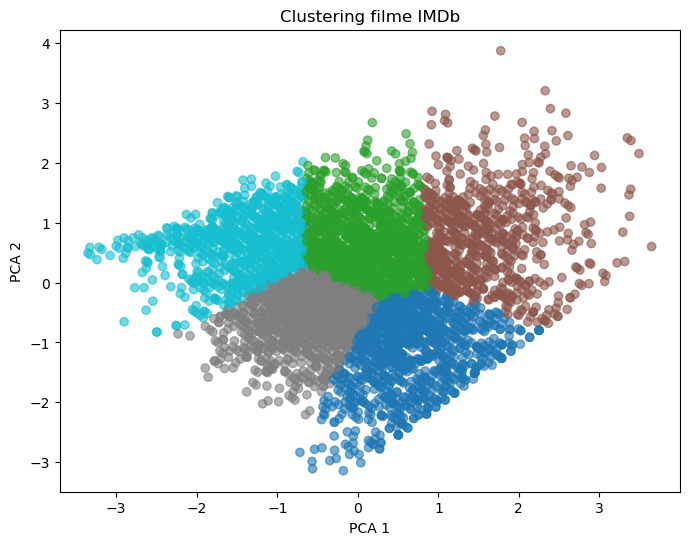

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_imdb_netflix["cluster"], cmap="tab10", alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustering filme IMDb")
plt.show()


In [44]:

cluster_genre_means = df_imdb_netflix.groupby("cluster")[df_genres.columns.tolist()].mean()

# transform in percents
cluster_genre_percent = (cluster_genre_means * 100).round(1)

# display table
pd.set_option('display.max_columns', None) 
pd.set_option('display.precision', 1)

display(cluster_genre_percent)


,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,\N
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7.2,0.3,4.7,8.4,3.5,24.8,6.3,22.7,39.4,5.5,3.8,0.3,3.3,3.3,2.7,1.3,3.7,0.4,3.1,10.3,2.3,13.7,2.2,2.7,5.0,0.4,0.0,0.5
1,21.6,0.0,11.2,4.6,3.0,38.6,16.3,6.5,46.4,7.6,5.1,0.3,2.2,10.0,1.9,1.4,10.1,0.1,0.6,15.1,4.3,0.6,2.1,0.1,17.7,0.9,0.6,0.0
2,17.9,0.0,10.1,6.8,0.4,41.4,9.2,4.5,33.0,9.1,4.2,0.3,0.8,11.8,1.6,1.1,4.1,0.0,1.3,11.4,2.9,2.9,1.4,1.3,15.3,0.4,0.5,0.3
3,12.2,0.0,6.9,7.9,7.7,30.6,12.6,31.0,43.4,4.0,3.2,0.2,5.9,1.7,5.0,1.0,4.1,0.2,1.4,11.7,1.8,1.7,3.2,0.5,5.3,1.7,0.1,0.4
4,25.6,0.0,17.0,6.5,11.1,31.7,21.7,4.7,61.6,3.7,6.6,0.0,4.5,7.6,3.0,1.8,9.1,0.1,0.0,14.7,6.2,0.0,2.5,0.0,14.6,2.1,0.5,0.0


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd


features = (
    df_genres.columns.tolist() +
    ["num_votes_log", "average_rating", "release_year", "runtime"]
)


df_cluster_data = df_imdb_netflix[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_data)


kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_imdb_netflix["cluster_v2"] = kmeans.fit_predict(X_scaled)




In [46]:

cluster_genre_percent_v2 = (
    df_imdb_netflix.groupby("cluster_v2")[df_genres.columns].mean() * 100
).round(1)

# general statistics
cluster_stats_v2 = df_imdb_netflix.groupby("cluster_v2").agg({
    "average_rating": "mean",
    "num_votes": "mean",
    "release_year": "mean",
    "runtime": "mean",
    "id": "count"
}).rename(columns={
    "average_rating": "avg_rating",
    "num_votes": "avg_votes",
    "release_year": "avg_year",
    "runtime": "avg_runtime",
    "id": "count"
}).round(2)

#  join results
cluster_summary_v2 = cluster_stats_v2.join(cluster_genre_percent_v2)

# extract top 3 
def top_genres(row, n=3):
    return ', '.join(row.sort_values(ascending=False).head(n).index)

cluster_summary_v2["top_3_genres"] = cluster_genre_percent_v2.apply(top_genres, axis=1)


cluster_profile_v2 = cluster_summary_v2[[
    "count", "avg_rating", "avg_votes", "avg_year", "avg_runtime", "top_3_genres"
]]

pd.set_option("display.max_colwidth", None)
display(cluster_profile_v2)


,count,avg_rating,avg_votes,avg_year,avg_runtime,top_3_genres
cluster_v2,,,,,,
0,1637,6.2,15967.5,2013.2,93.0,"Comedy, Drama, Romance"
1,357,5.6,29098.5,2014.5,89.3,"Horror, Thriller, Drama"
2,1067,7.0,2183.7,2015.5,67.2,"Documentary, Short, Comedy"
3,1802,6.5,41954.7,2013.0,110.2,"Drama, Crime, Action"
4,647,6.4,50954.3,2012.6,72.4,"Adventure, Animation, Action"


C:\Users\adelg\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


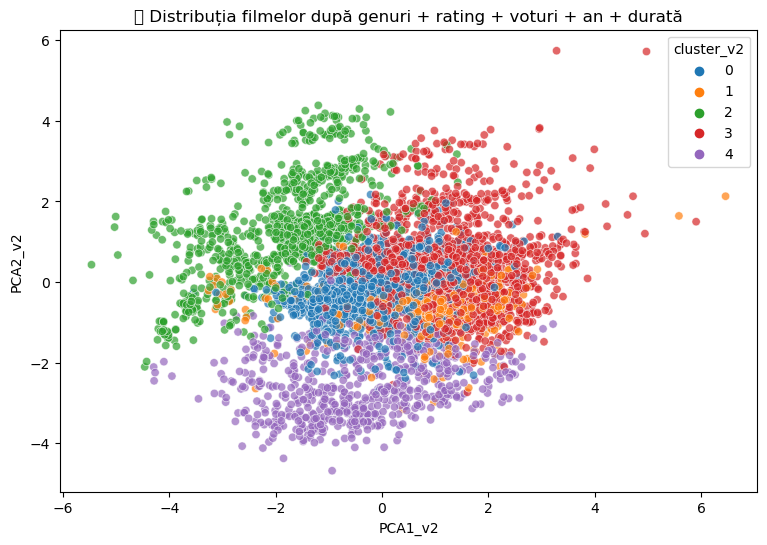

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_imdb_netflix["PCA1_v2"] = X_pca[:, 0]
df_imdb_netflix["PCA2_v2"] = X_pca[:, 1]

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df_imdb_netflix,
    x="PCA1_v2", y="PCA2_v2",
    hue="cluster_v2", palette="tab10", alpha=0.7
)
plt.title("🎬 Distribuția filmelor după genuri + rating + voturi + an + durată")
plt.show()


In [48]:

label_map = {'Average': 0, 'Bad': 1, 'Excellent': 2, 'Good': 3}


features = [
    'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History', 'Horror',
    'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
    'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', '\\N',
    'num_votes_log', 'release_year', 'runtime',
    'type_movie', 'type_short', 'type_tvEpisode', 'type_tvMiniSeries',
    'type_tvMovie', 'type_tvSeries', 'type_tvShort', 'type_tvSpecial', 'type_video'
]

X = df_imdb_netflix[features]
y = df_imdb_netflix['rating_class'].map(label_map)

model_XGBC.fit(X, y)

df_imdb_netflix['predicted_class_num'] = model_XGBC.predict(X)


inverse_map = {v: k for k, v in label_map.items()}
df_imdb_netflix['predicted_class'] = df_imdb_netflix['predicted_class_num'].map(inverse_map)


cluster_analysis_v2 = (
    df_imdb_netflix
    .groupby('cluster_v2')
    .agg({
        'predicted_class': lambda x: x.value_counts().index[0],  # cea mai frecventă clasă prezisă
        'average_rating': 'mean'                               # media ratingului real
    })
    .rename(columns={'predicted_class': 'dominant_predicted_class', 'average_rating': 'avg_real_rating'})
    .round(2)
)

print(cluster_analysis_v2)


           dominant_predicted_class  avg_real_rating
cluster_v2                                          
0                           Average              6.2
1                           Average              5.6
2                              Good              7.0
3                              Good              6.5
4                           Average              6.4


In [49]:
df_imdb_netflix[
    (df_imdb_netflix["predicted_class"] == "Excellent") &
    (df_imdb_netflix["average_rating"] < 6.0)
][["title", "average_rating", "num_votes", "release_year"]]



,title,average_rating,num_votes,release_year
177,a very murray christmas,5.5,14394,2015
4493,the frozen ground,5.1,7,2013


In [50]:
# Filme la care modelul a gresit prezicerea si compara cu realitatea (rating_class si predicted_class)
df_errors = df_imdb_netflix[df_imdb_netflix["predicted_class"] != df_imdb_netflix["rating_class"]]
df_errors[["title", "rating_class", "predicted_class", "average_rating", "num_votes", "release_year"]].head(20)


,title,rating_class,predicted_class,average_rating,num_votes,release_year
3,9,Average,Good,5.4,81,2009
5,122,Average,Bad,5.9,2468,2019
16,#cats_the_mewvie,Average,Good,5.3,401,2020
20,#rucker50,Average,Good,5.2,99,2016
25,1 chance 2 dance,Bad,Average,4.8,524,2014
43,17 again,Average,Good,6.4,183111,2009
55,21 thunder,Average,Good,6.2,950,2017
58,25 kille,Average,Good,5.9,92,2016
59,26 years,Average,Good,6.3,955,2012
70,365 days,Bad,Good,3.2,56077,2020


In [51]:
df_imdb_netflix[df_imdb_netflix["predicted_class"] == "Excellent"][["title", "average_rating", "num_votes", "release_year"]].head(20)


,title,average_rating,num_votes,release_year
38,13th,8.3,32641,2016
64,3 idiots,8.4,350092,2009
114,a clockwork orange,8.3,765954,1971
118,a family affair,8.1,64,2015
137,a korean odyssey,8.1,3255,2017
140,a lion in the house,8.7,245,2006
177,a very murray christmas,5.5,14394,2015
228,africa,9.0,14322,2013
229,africa,8.1,40,2013
237,aftermath,8.2,92,2017


In [52]:
df_imdb_netflix[
    (df_imdb_netflix["predicted_class"] == "Bad") &
    (df_imdb_netflix["average_rating"] > 7.0)
][["title", "average_rating", "num_votes", "release_year"]]
# subestimat din cauza la nr de voturi mici

,title,average_rating,num_votes,release_year
2105,innocent,8.5,340,2017


In [53]:

excellent_movies = (
    df_imdb_netflix[df_imdb_netflix["predicted_class"] == "Excellent"]
    .sort_values(["cluster_v2", "average_rating"], ascending=[True, False])
)


excellent_movies = excellent_movies[[
    "cluster_v2",
    "title",
    "genres",    
    "average_rating",
    #"num_votes",
    #"cluster_v2"
]]


top5_per_cluster = (
    excellent_movies.groupby("cluster_v2")
    .head(5)
    .reset_index(drop=True)
)

print("Top 5 filme prezise ca 'Excellent' din fiecare cluster:\n")
display(top5_per_cluster)


Top 5 filme prezise ca 'Excellent' din fiecare cluster:



,cluster_v2,title,genres,average_rating
0,0,the 12th man,"Comedy,Drama,Family",9.2
1,0,reply 1988,"Comedy,Drama,Family",9.1
2,0,yeh meri family,"Comedy,Drama,Family",9.1
3,0,humsafar,"Drama,Romance",9.0
4,0,no longer kids,Comedy,9.0
5,1,the trial,"Comedy,Fantasy,Horror",9.4
6,1,remember,"Drama,Horror,Thriller",8.7
7,1,the haunting of hill house,"Drama,Horror,Mystery",8.6
8,1,parasyte: the maxim,"Action,Animation,Horror",8.3
9,1,paranoid,"Horror,Short",8.2


In [54]:
df_imdb_netflix.to_csv('imdb_netflix_clean.csv', index=False)
